In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import preprocessing

# kmeans - segmentacja obrazów

Segmentacja to podział obrazu na atomowe części. Przydaj się do wykrywania podstawowych obiektów na obrazach - wykrywamy obiekty a potem klasyfikujemy je np. czy to twarz czy nie. Ma zastosowanie w głównie w grafice ale nie tylko. 

Biometra - identyfikacja osób na podstawie tęczówki. Pierwszym krokiem jest lokalizacja tęczówki a drugiom klasyfikacja.

# Zad. 
Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja). 
  * Każdy piksel reprezentuj jako punkt w $R^5$ 
    * gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB 
    * a ostatnie dwie to położenie piksela na obrazku. 

Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.

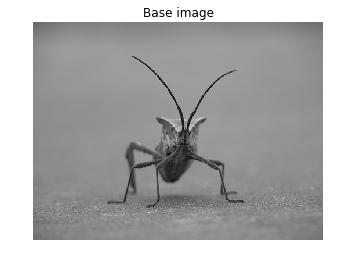

In [2]:
import matplotlib.image as mpimg

img = mpimg.imread("stinkbug.png")
plt.imshow(img, cmap=plt.cm.viridis)
plt.axis('off')
plt.title("Base image")
plt.show()

In [3]:
dim_x, dim_y, _ = img.shape
img_2d = np.array([np.append(img[i][j], [i, j]) for i in range(dim_x) for j in range(dim_y)])
img_2d.shape

(187500, 5)

In [4]:
# import seaborn as sns
# df=pd.DataFrame(img_2d[:1000,:])
# sns.pairplot(df)
# plt.show()

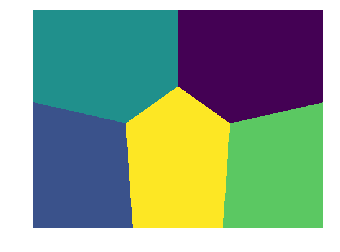

In [7]:
k=5
kmeans = KMeans(n_clusters=k).fit(img_2d)
seg_img = [[kmeans.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img, cmap=plt.cm.viridis)
plt.axis('off')
plt.show()

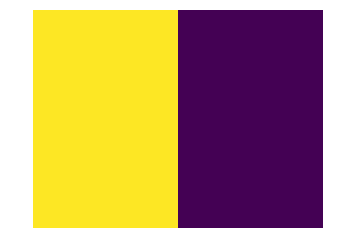

In [6]:
k=2
kmeans = KMeans(n_clusters=k).fit(img_2d)
seg_img = [[kmeans.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img, cmap=plt.cm.viridis)
plt.axis('off')
plt.show()

# Zad. 
Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja).
  * **Najpier wykonaj skalowanie każdej współrzędnej**
  * Każdy piksel reprezentuj jako punkt w $R^5$ 
    * gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB 
    * a ostatnie dwie to położenie piksela na obrazku. 

Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(img_2d)
img_2d_standard_scaler = scaler.transform(img_2d)

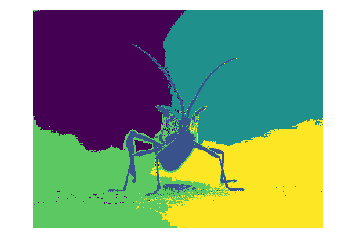

In [10]:
k=5
kmeans_standard_scaler = KMeans(n_clusters=k).fit(img_2d_standard_scaler)
seg_img_standard_scaler = [[kmeans_standard_scaler.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img_standard_scaler, cmap=plt.cm.viridis)
plt.axis('off')
plt.show()

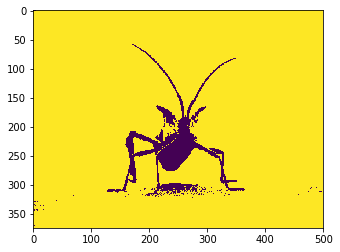

In [52]:
k=2
kmeans_standard_scaler = KMeans(n_clusters=k).fit(img_2d_standard_scaler)
seg_img_standard_scaler = [[kmeans_standard_scaler.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]

plt.imshow(seg_img_standard_scaler, cmap=plt.cm.viridis)
plt.show()